###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Objective:
<font color=darkblue>
    
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.


###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Resources Available:  
<font color=darkblue>
&nbsp;
The data for this project is available in file 
&nbsp;
https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/
    
###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Steps and Tasks:
###  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Exploratory data quality report reflecting the following:
1. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers (10 Marks)
2. Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. (10 marks)
3. Feature Engineering techniques (10 marks)
    * Identify opportunities (if any) to extract a new feature from existing features, drop a feature (if required)
    * Get data model ready and do a train test split.
    * Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree.

###  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Creating the model and tuning it
1. Algorithms that you think will be suitable for this project (at least 3 algorithms). Use Kfold Cross Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (15 marks)
2. Techniques employed to squeeze that extra performance out of the model without making it over fit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)
    
###  <span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Attribute Information:
* Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.
    
Name -- Data Type -- Measurement -- Description
* Cement (cement) -- quantitative -- kg in a m3 mixture -- Input Variable
* Blast Furnace Slag (slag) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fly Ash (ash) -- quantitative -- kg in a m3 mixture -- Input Variable
* Water (water) -- quantitative -- kg in a m3 mixture -- Input Variable
* Superplasticizer (superplastic) -- quantitative -- kg in a m3 mixture -- Input Variable
* Coarse Aggregate (coarseagg) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fine Aggregate (fineagg) -- quantitative -- kg in a m3 mixture -- Input Variable
* Age(age) -- quantitative -- Day (1~365) -- Input Variable
* Concrete compressive strength(strength) -- quantitative -- MPa -- Output Variable

###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Deliverable - 1: 
<font color=darkblue>
<br/>    
<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">1. Univariate analysis (10 marks)</span>
<ol>
 <li>
    The distribution of each attribute
 </li>
 <li>
    Datatype
 </li>
 <li>
    Range
 </li>
 <li>
    min,max,count,25th percentile,50th percentile, 75th percentile value
 </li>
 <li>
    find the number zeros in the column
 </li>
</ol>


<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea"> Import all necessary modules and load the data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity
sns.set_style('darkgrid')

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea"> Load and review data

In [2]:
df = pd.read_csv("concrete.csv");
df.head(20)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0    141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1    168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2    250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3    266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4    154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5    255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6    166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7    251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8    296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9    155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   
10   151.8  178.1  138.7  167.5          18.3      944.0    694.6   28   
11   173.0  116.0    0.0  192.0           0.0      946.8    856.8    3   
12   385.0    0.0    0.0  186.0           0.0      966.0    763.0   14   
13   237.5  237.5    0.0  228.0           0.0      932.0    594.0    7   
14   167.0  187.0  195.0  185.0           7.0      898.0    636.0   28   
15   213.8   98.1   24.5  181.7           6.7     1066.0    785.5  100   
16   237.5  237.5    0.0  228.0           0.0      932.0    594.0   28   
17   336.0    0.0    0.0  182.0           3.0      986.0    817.0   28   
18   190.7    0.0  125.4  162.1           7.8     1090.0    804.0    3   
19   312.7    0.0    0.0  178.1           8.0      999.7    822.2   28   

    strength  
0      29.89  
1      23.51  
2      29.22  
3      45.85  
4      18.29  
5      21.86  
6      15.75  
7      36.64  
8      21.65  
9      28.99  
10     36.35  
11      6.94  
12     27.92  
13     26.26  
14     23.89  
15     49.97  
16     30.08  
17     44.86  
18     15.04  
19     25.10

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea"> Print the datatypes of each column and the shape of the dataset

In [3]:
df.shape

(1030, 9)

In [4]:
df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [5]:
df.dtypes.value_counts()

float64    8
int64      1
dtype: int64

In [6]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea"> Range

In [7]:
print(df.max() - df.min())

cement          438.00
slag            359.40
ash             200.10
water           125.20
superplastic     32.20
coarseagg       344.00
fineagg         398.60
age             364.00
strength         80.27
dtype: float64


<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Print the descriptive statistics (min,max,count,25th percentile,50th percentile, 75th percentile values)

In [8]:
df.describe().transpose()

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea"> IQR  -

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea"> Median

In [10]:
df.median()

cement          272.900
slag             22.000
ash               0.000
water           185.000
superplastic      6.400
coarseagg       968.000
fineagg         779.500
age              28.000
strength         34.445
dtype: float64

In [11]:
df.skew()   # to measure the skewness of every attribute

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Find the number zeros in the column and the missing values

In [12]:
(df == 0).sum() # We have coloums which have zero values Slag, ash and Superplastic

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Ash, Slag and Superplastic has a lot of zeros are they missing values and need to be imputed</span>

In [13]:
df.isna().sum() # We don't have any missing values

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc.

In [14]:
#plt.figure(figsize=(16,9)) # set figure size.
cement = df['cement']
#plt.hist(cement, bins=50)

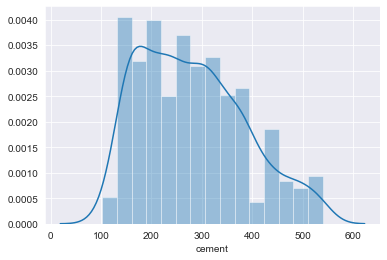

In [15]:
#plt.figure(figsize=(16,9)) # set figure size.
#sns.distplot(cement,bins=50)
sns.distplot(cement)
#sns.countplot(cement)

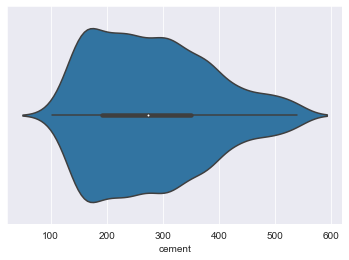

In [16]:
sns.violinplot(cement)

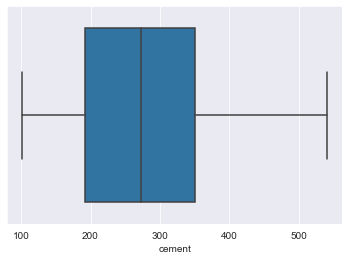

In [17]:
sns.boxplot(cement)
plt.show()

Mean:  281.1678640776698 
Median:  272.9 
Mode:  362.6 
Skew:  0.5094811788717731


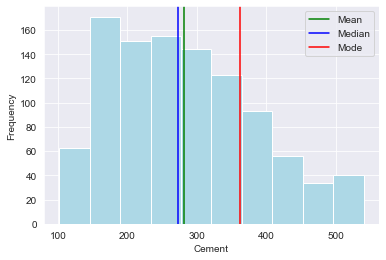

In [18]:
mean=cement.mean()
median=cement.median()
mode=cement.mode()
skew=cement.skew()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0], '\nSkew: ',skew)

#plt.figure(figsize=(10,5)) # set the figure size
#plt.hist(cement,bins=100,color='lightblue') #Plot the histogram
plt.hist(cement,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')
#plt.axvline(mode[1],color='red',label='Mode2')

plt.xlabel('Cement')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

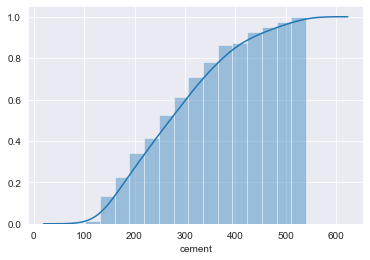

In [19]:
#plt.figure(figsize=(16,9)) # set figure size.
#Cumulative Distribution
sns.distplot(cement, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

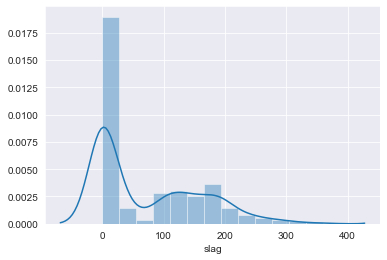

In [20]:
#plt.figure(figsize=(16,9)) # set figure size.
slag = df['slag']
sns.distplot(slag)

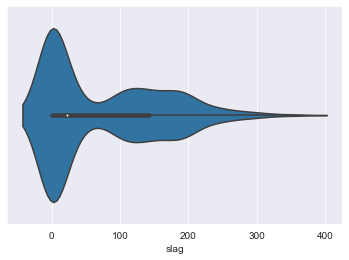

In [21]:
sns.violinplot(slag)

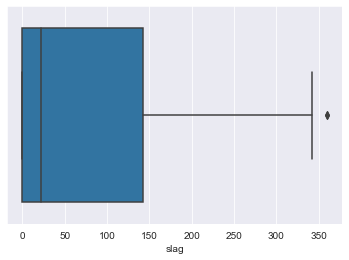

In [22]:
sns.boxplot(slag)
plt.show()
#There are outliers we may have to treat them

Mean:  73.89582524271844 
Median:  22.0 
Mode:  0.0 
Skew:  0.8007168956061774


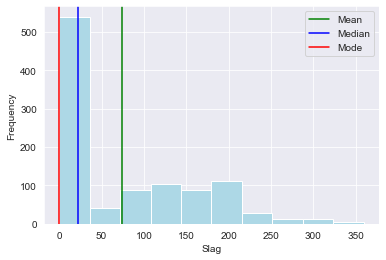

In [23]:
mean=slag.mean()
median=slag.median()
mode=slag.mode()
skew=slag.skew()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0], '\nSkew: ',skew)

#plt.figure(figsize=(10,5)) # set the figure size
#plt.hist(cement,bins=100,color='lightblue') #Plot the histogram
plt.hist(slag,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')
#plt.axvline(mode[1],color='red',label='Mode2')

plt.xlabel('Slag')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

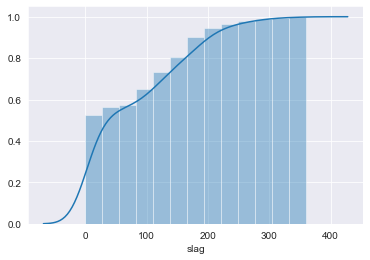

In [24]:
sns.distplot(slag, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

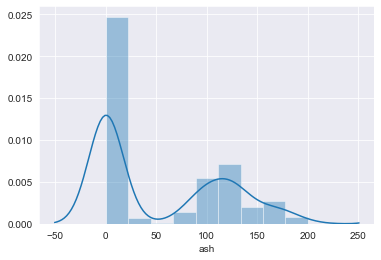

In [25]:
#plt.figure(figsize=(16,9)) # set figure size.
ash = df['ash']
sns.distplot(ash)

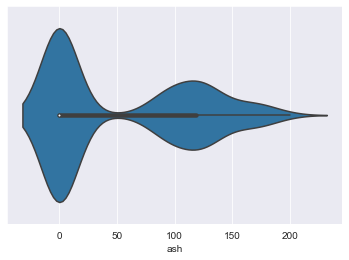

In [26]:
sns.violinplot(ash)

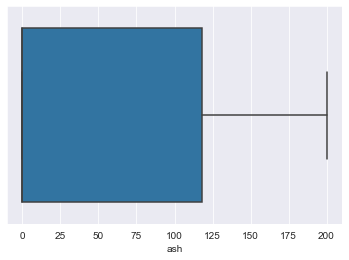

In [27]:
sns.boxplot(ash)
plt.show()

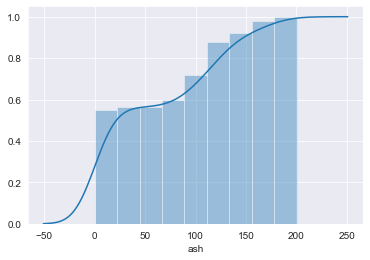

In [28]:
sns.distplot(ash, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

Mean:  54.188349514563086 
Median:  0.0 
Mode:  0.0 
Skew:  0.5373539058066844


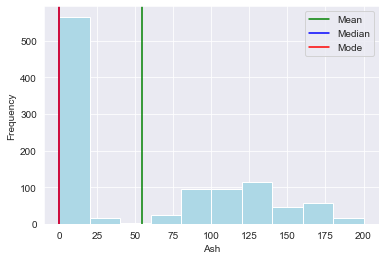

In [29]:
mean=ash.mean()
median=ash.median()
mode=ash.mode()
skew=ash.skew()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0], '\nSkew: ',skew)

#plt.figure(figsize=(10,5)) # set the figure size
#plt.hist(cement,bins=100,color='lightblue') #Plot the histogram
plt.hist(ash,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')
#plt.axvline(mode[1],color='red',label='Mode2')

plt.xlabel('Ash')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

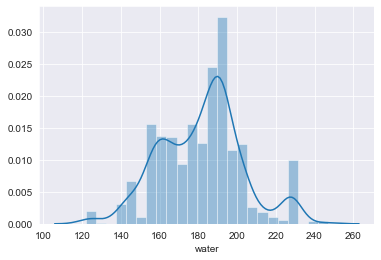

In [30]:
#plt.figure(figsize=(16,9)) # set figure size.
water = df['water']
sns.distplot(water)

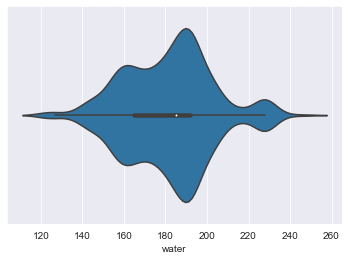

In [31]:
sns.violinplot(water)

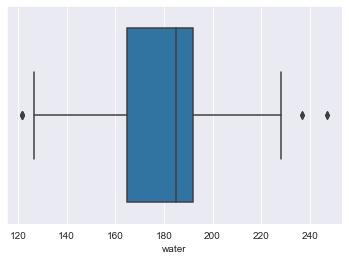

In [32]:
sns.boxplot(water)
plt.show()
#There are outliers we may have to treat them

Mean:  181.56728155339798 
Median:  185.0 
Mode:  192.0 
Skew:  0.07462838428549402


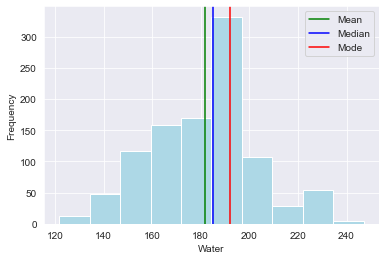

In [33]:
mean=water.mean()
median=water.median()
mode=water.mode()
skew=water.skew()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0], '\nSkew: ',skew)

#plt.figure(figsize=(10,5)) # set the figure size
#plt.hist(cement,bins=100,color='lightblue') #Plot the histogram
plt.hist(water,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')
#plt.axvline(mode[1],color='red',label='Mode2')

plt.xlabel('Water')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

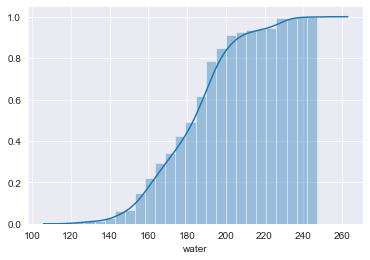

In [34]:
sns.distplot(water, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

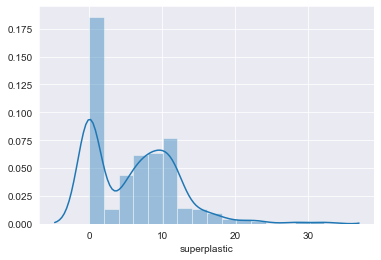

In [35]:
#plt.figure(figsize=(16,9)) # set figure size.
superplastic = df['superplastic']
sns.distplot(superplastic)

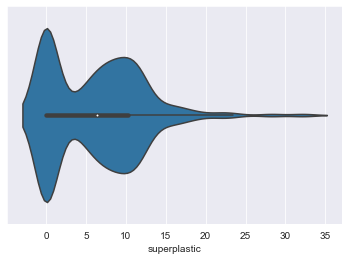

In [36]:
sns.violinplot(superplastic)

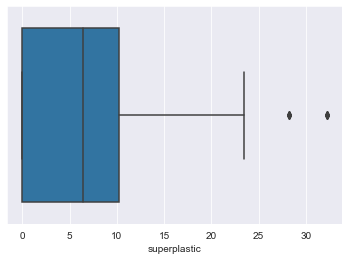

In [37]:
sns.boxplot(superplastic)
plt.show()
#There are outliers we may have to treat them

Mean:  6.204660194174756 
Median:  6.4 
Mode:  0.0 
Skew:  0.9072025748672466


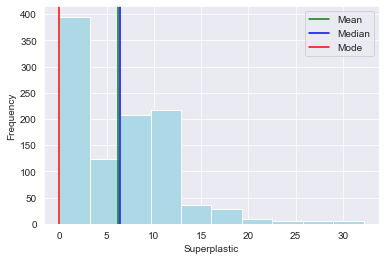

In [38]:
mean=superplastic.mean()
median=superplastic.median()
mode=superplastic.mode()
skew=superplastic.skew()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0], '\nSkew: ',skew)

#plt.figure(figsize=(10,5)) # set the figure size
#plt.hist(cement,bins=100,color='lightblue') #Plot the histogram
plt.hist(superplastic,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')
#plt.axvline(mode[1],color='red',label='Mode2')

plt.xlabel('Superplastic')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

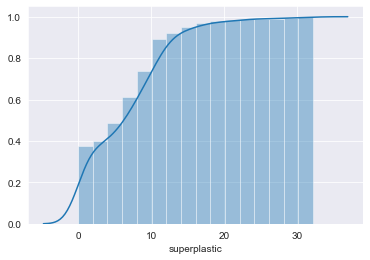

In [39]:
sns.distplot(superplastic, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

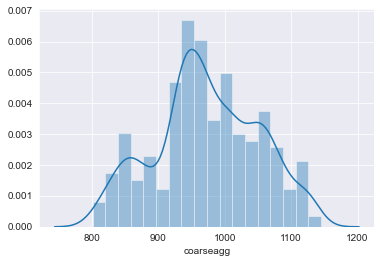

In [40]:
#['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg', 'age', 'strength']
#plt.figure(figsize=(16,9)) # set figure size.
coarseagg = df['coarseagg']
sns.distplot(coarseagg)

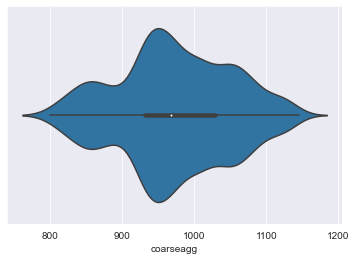

In [41]:
sns.violinplot(coarseagg)

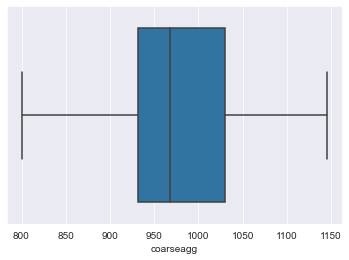

In [42]:
sns.boxplot(coarseagg)
plt.show()

Mean:  972.918932038835 
Median:  968.0 
Mode:  932.0 
Skew:  -0.04021974481106704


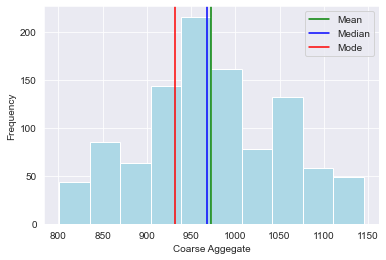

In [43]:
mean=coarseagg.mean()
median=coarseagg.median()
mode=coarseagg.mode()
skew=coarseagg.skew()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0], '\nSkew: ',skew)

#plt.figure(figsize=(10,5)) # set the figure size
#plt.hist(cement,bins=100,color='lightblue') #Plot the histogram
plt.hist(coarseagg,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')
#plt.axvline(mode[1],color='red',label='Mode2')

plt.xlabel('Coarse Aggegate')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

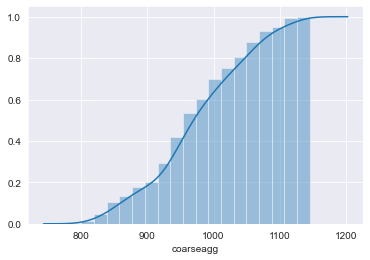

In [44]:
sns.distplot(coarseagg, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

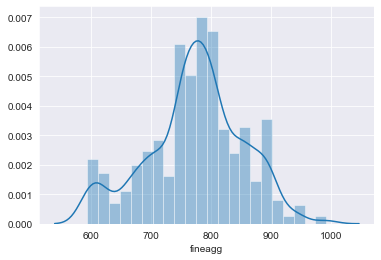

In [45]:
#plt.figure(figsize=(16,9)) # set figure size.
fineagg = df['fineagg']
sns.distplot(fineagg)

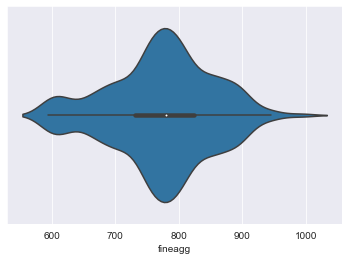

In [46]:
sns.violinplot(fineagg)

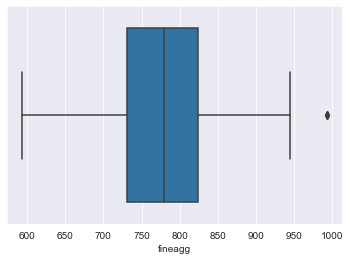

In [47]:
sns.boxplot(fineagg)
plt.show()
#There are outliers we may have to treat them

Mean:  773.5804854368932 
Median:  779.5 
Mode:  594.0 
Skew:  -0.25300959769707143


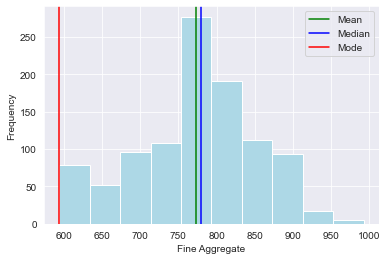

In [48]:
mean=fineagg.mean()
median=fineagg.median()
mode=fineagg.mode()
skew=fineagg.skew()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0], '\nSkew: ',skew)

#plt.figure(figsize=(10,5)) # set the figure size
#plt.hist(cement,bins=100,color='lightblue') #Plot the histogram
plt.hist(fineagg,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')
#plt.axvline(mode[1],color='red',label='Mode2')

plt.xlabel('Fine Aggregate')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

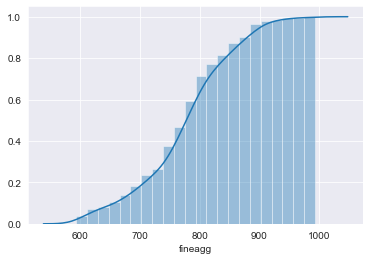

In [49]:
sns.distplot(fineagg, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

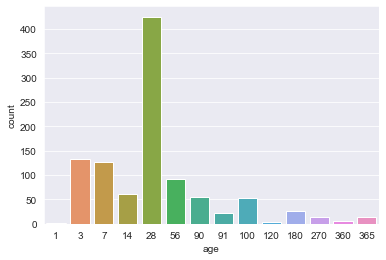

In [50]:
#plt.figure(figsize=(16,9)) # set figure size.
age = df['age']
sns.countplot(age)

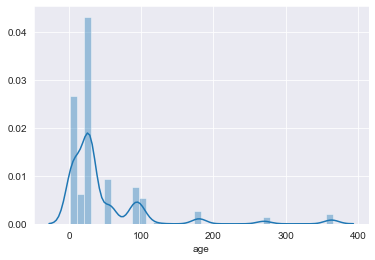

In [51]:
sns.distplot(age)

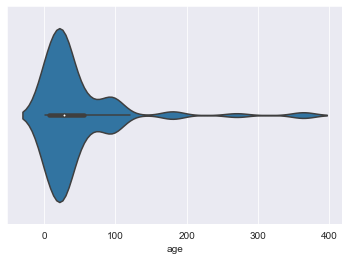

In [52]:
sns.violinplot(age)

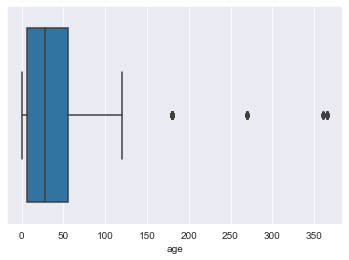

In [53]:
sns.boxplot(age)
plt.show()
#There are outliers we may have to treat them

Mean:  45.662135922330094 
Median:  28.0 
Mode:  28 
Skew:  3.2691774006345895


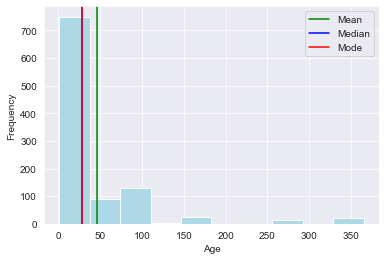

In [54]:
mean=age.mean()
median=age.median()
mode=age.mode()
skew=age.skew()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0], '\nSkew: ',skew)

#plt.figure(figsize=(10,5)) # set the figure size
#plt.hist(cement,bins=100,color='lightblue') #Plot the histogram
plt.hist(age,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')
#plt.axvline(mode[1],color='red',label='Mode2')

plt.xlabel('Age')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

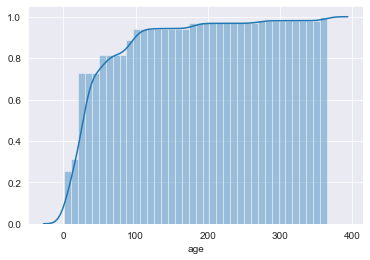

In [55]:
sns.distplot(age, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

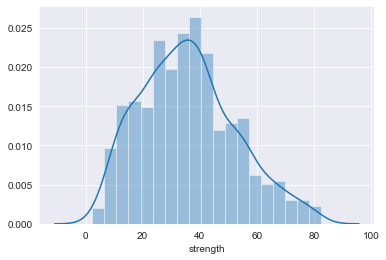

In [56]:
#plt.figure(figsize=(16,9)) # set figure size.
strength = df['strength']
sns.distplot(df['strength'])

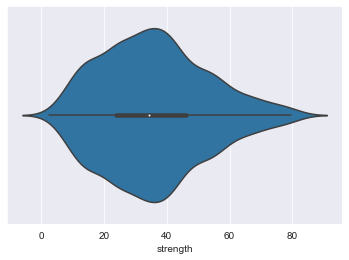

In [57]:
sns.violinplot(strength)

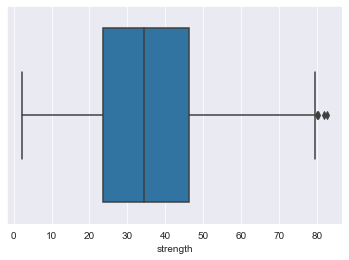

In [58]:
sns.boxplot(strength)
plt.show()
#There are outliers we may have to treat them

Mean:  35.81796116504854 
Median:  34.445 
Mode:  33.4 
Skew:  0.41697728841071807


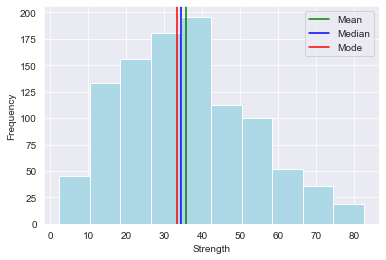

In [59]:
mean=strength.mean()
median=strength.median()
mode=strength.mode()
skew=strength.skew()

print('Mean: ',mean,'\nMedian: ',median,'\nMode: ',mode[0], '\nSkew: ',skew)

#plt.figure(figsize=(10,5)) # set the figure size
#plt.hist(cement,bins=100,color='lightblue') #Plot the histogram
plt.hist(strength,color='lightblue') #Plot the histogram

plt.axvline(mean,color='green',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in GRE Score
plt.axvline(median,color='blue',label='Median')
plt.axvline(mode[0],color='red',label='Mode')
#plt.axvline(mode[1],color='red',label='Mode2')

plt.xlabel('Strength')   # label the x-axis
plt.ylabel('Frequency')   # label the y-axis
plt.legend()              # Plot the legend
plt.show()

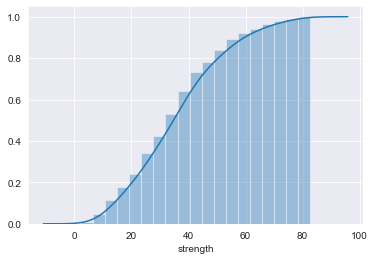

In [60]:
sns.distplot(strength, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True))

<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">This is the target variable</span>

###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Deliverable - 2: 
<font color=darkblue>
# Bi-variate Analysis (10 marks)

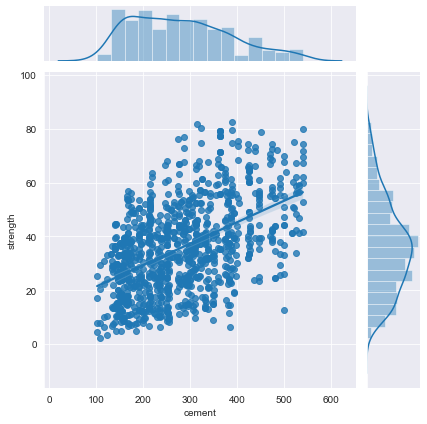

In [61]:
sns.jointplot(x="cement", y="strength", data=df, kind="reg")
plt.show()

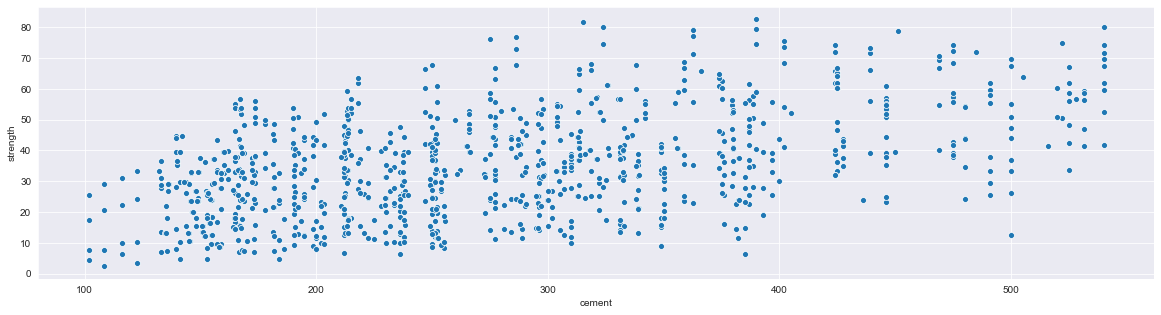

In [62]:
plt.figure(figsize=(20,5)) # set figure size.
sns.scatterplot(df['cement'], df['strength'])
plt.show()
# 

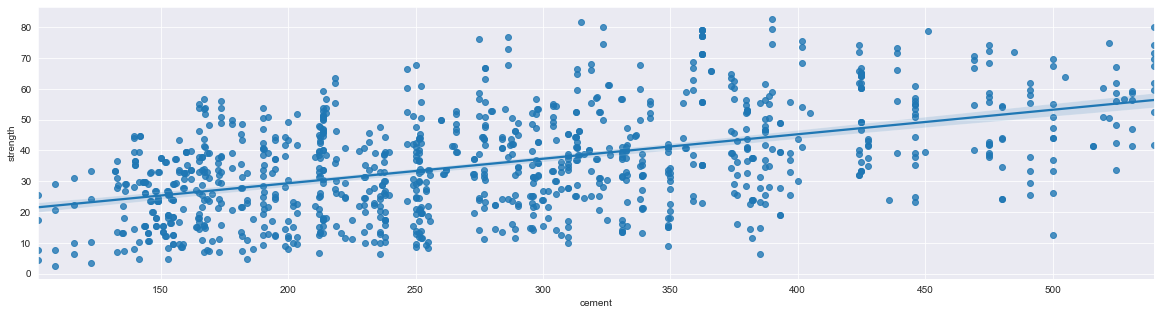

In [63]:
plt.figure(figsize=(20,5))
sns.regplot(x='cement',y='strength', data=df ) # regression plot - scatter plot with a regression line
plt.show()

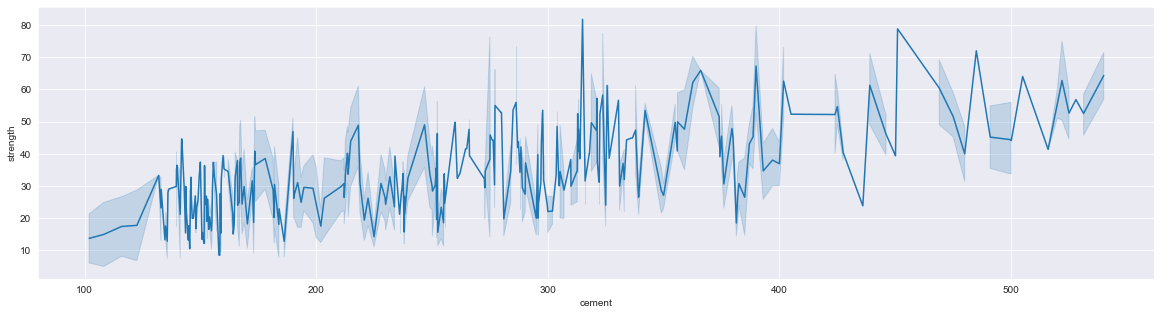

In [64]:
plt.figure(figsize=(20,5))
sns.lineplot(x='cement',y='strength', data=df )
plt.show()

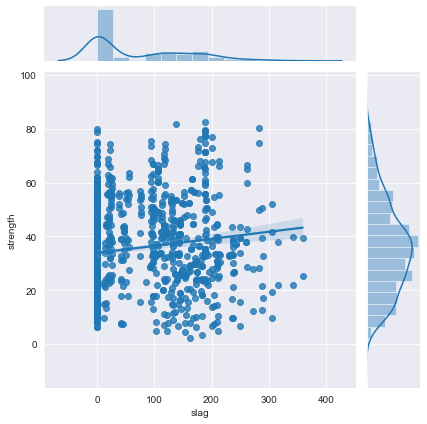

In [65]:
sns.jointplot(x="slag", y="strength", data=df, kind="reg")
plt.show()

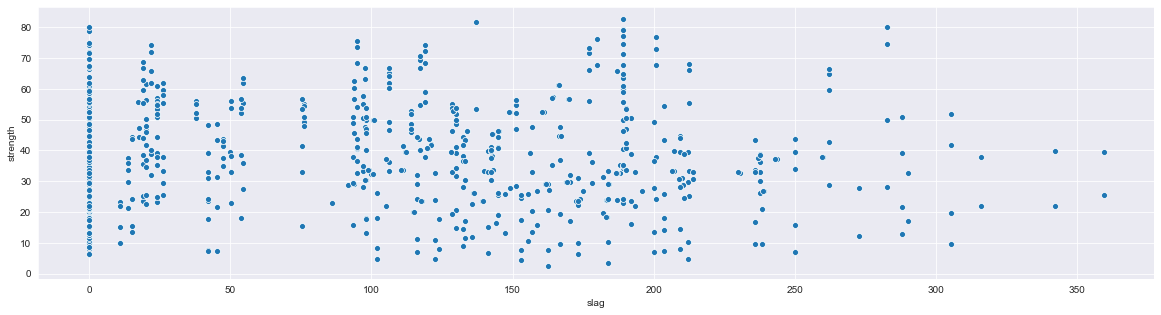

In [66]:
plt.figure(figsize=(20,5)) # set figure size.
sns.scatterplot(df['slag'], df['strength'])
plt.show()
# Looks like there are a lot of outliers here. We need to handle them.

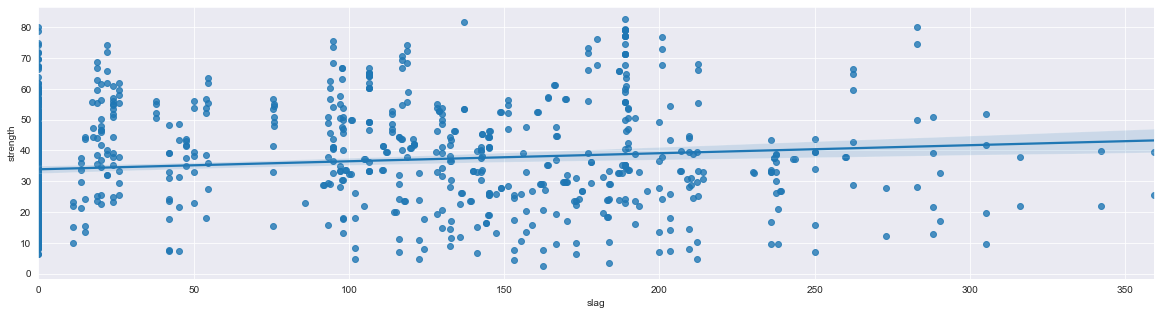

In [67]:
plt.figure(figsize=(20,5))
sns.regplot(x='slag',y='strength', data=df ) # regression plot - scatter plot with a regression line
plt.show()

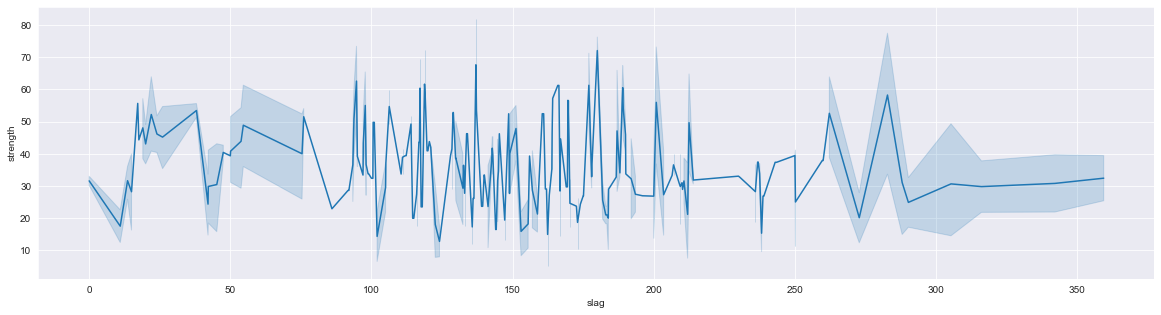

In [68]:
plt.figure(figsize=(20,5))
sns.lineplot(x='slag',y='strength', data=df )
plt.show()

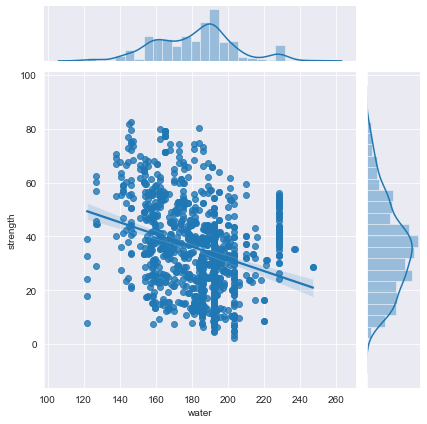

In [69]:
sns.jointplot(x="water", y="strength", data=df, kind="reg")
plt.show()
plt.show()

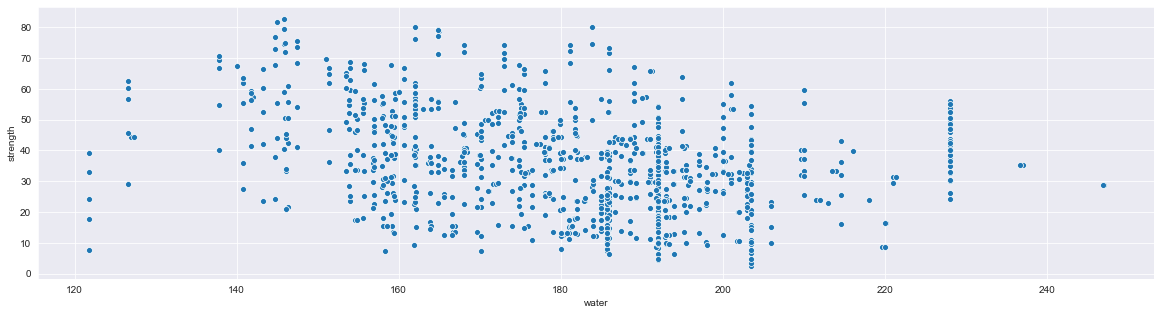

In [70]:
#['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
plt.figure(figsize=(20,5)) # set figure size.
sns.scatterplot(df['water'], df['strength'])
plt.show()
# Looks like there are a lot of outliers here. We need to handle them.

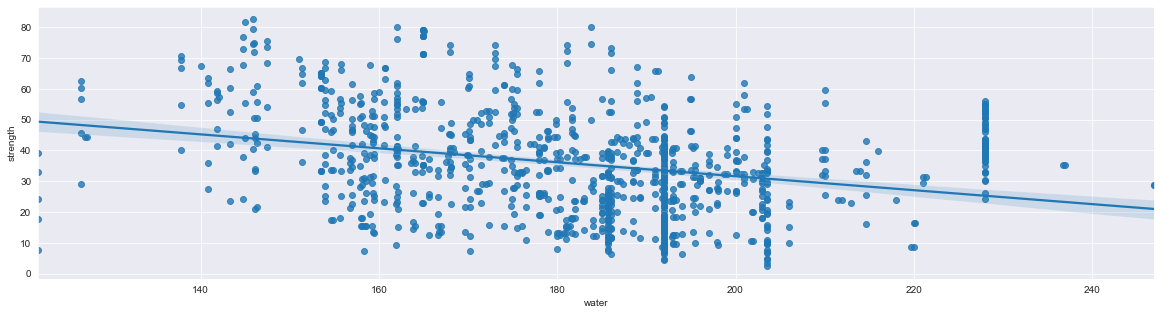

In [71]:
plt.figure(figsize=(20,5))
sns.regplot(x='water',y='strength', data=df )
plt.show()

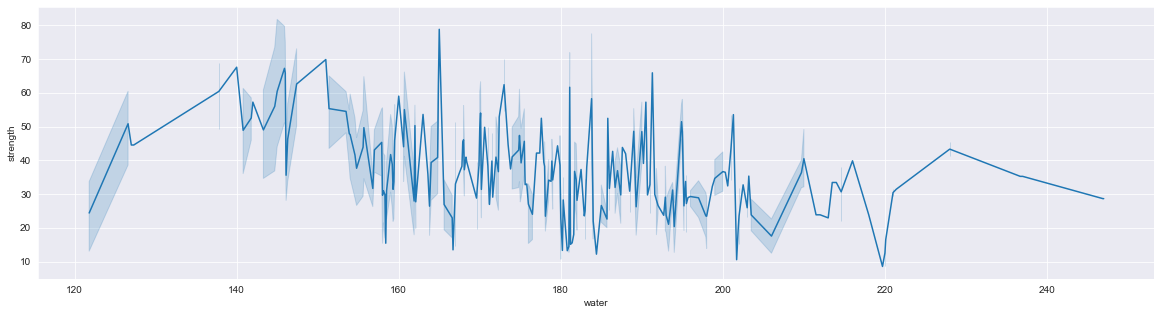

In [72]:
plt.figure(figsize=(20,5))
sns.lineplot(x='water',y='strength', data=df )
plt.show()

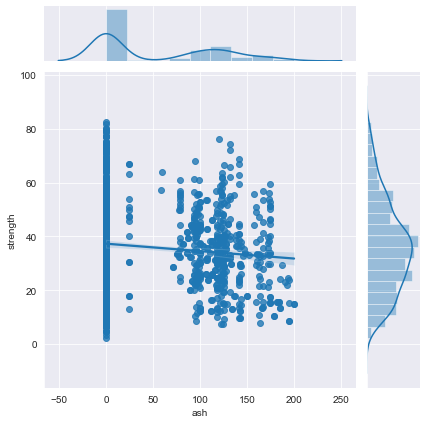

In [73]:
sns.jointplot(x="ash", y="strength", data=df, kind="reg")
plt.show()

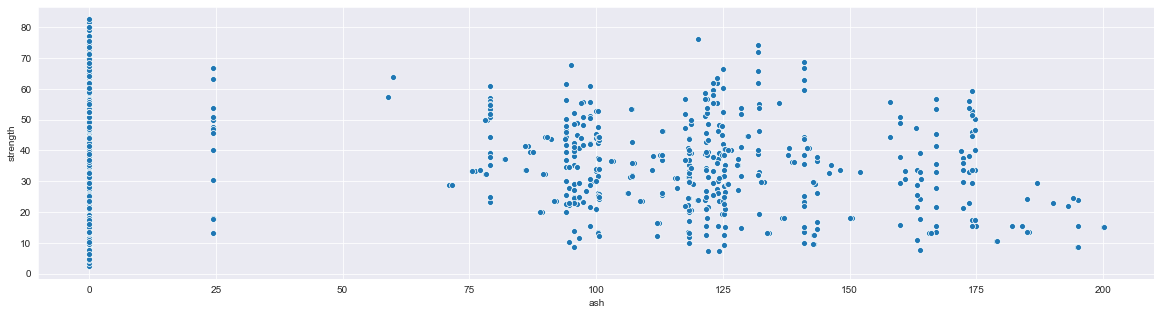

In [74]:
#['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
plt.figure(figsize=(20,5)) # set figure size.
sns.scatterplot(df['ash'], df['strength'])
plt.show()

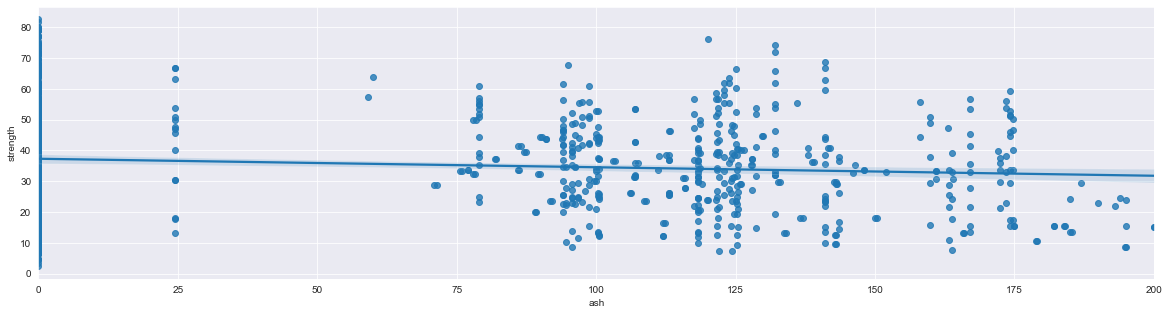

In [75]:
plt.figure(figsize=(20,5))
sns.regplot(x='ash',y='strength', data=df )
plt.show()

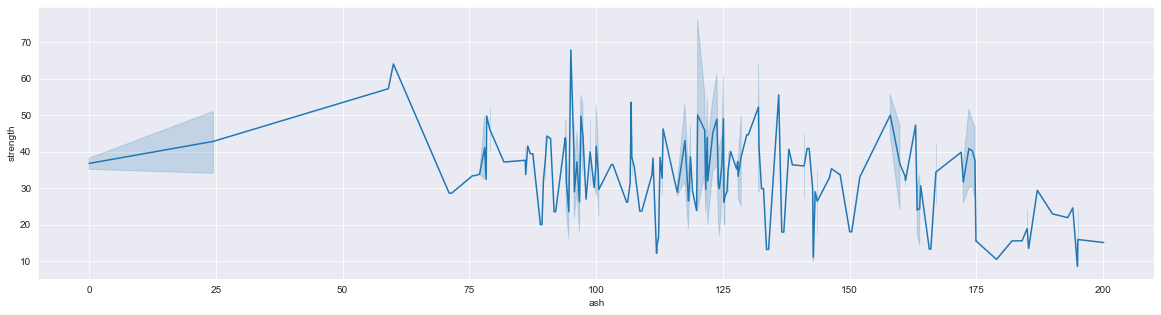

In [76]:
plt.figure(figsize=(20,5))
sns.lineplot(x='ash',y='strength', data=df )
plt.show()

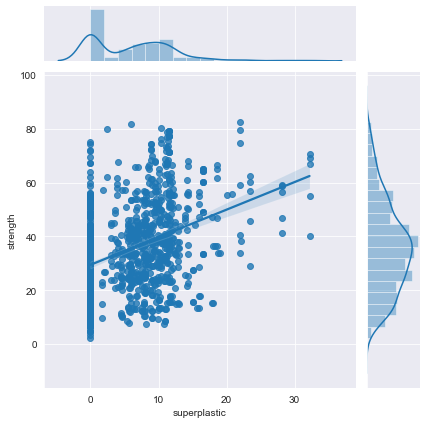

In [77]:
sns.jointplot(x="superplastic", y="strength", data=df, kind="reg")
plt.show()

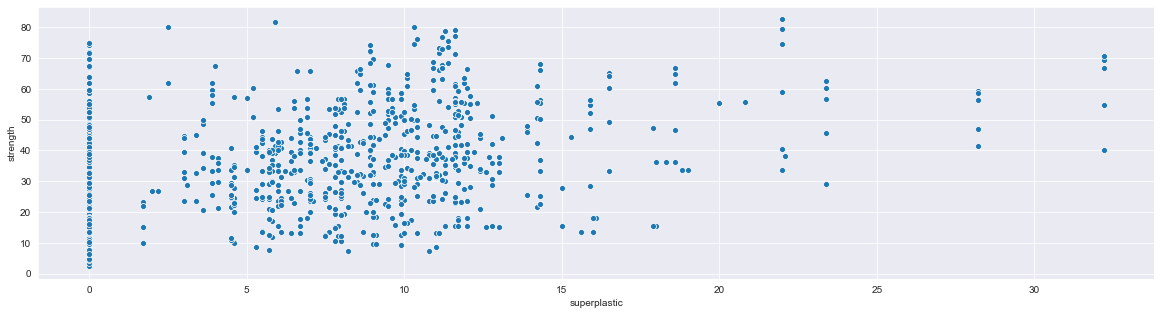

In [78]:
#['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
plt.figure(figsize=(20,5)) # set figure size.
sns.scatterplot(df['superplastic'], df['strength'])
plt.show()

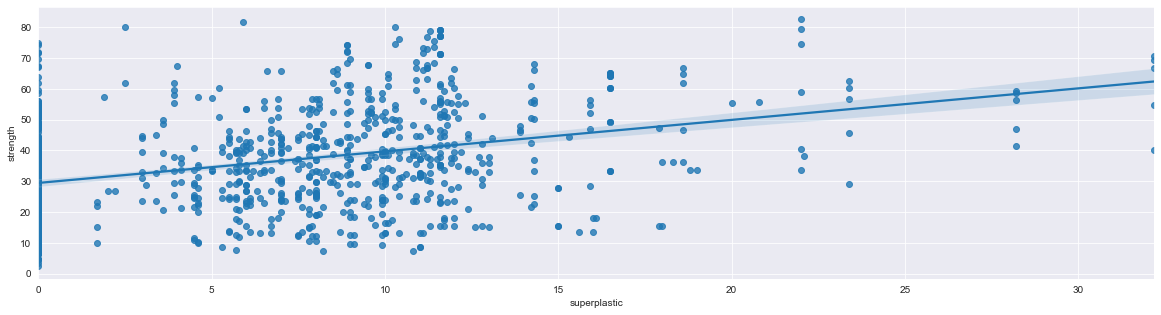

In [79]:
plt.figure(figsize=(20,5))
sns.regplot(x='superplastic',y='strength', data=df )
plt.show()

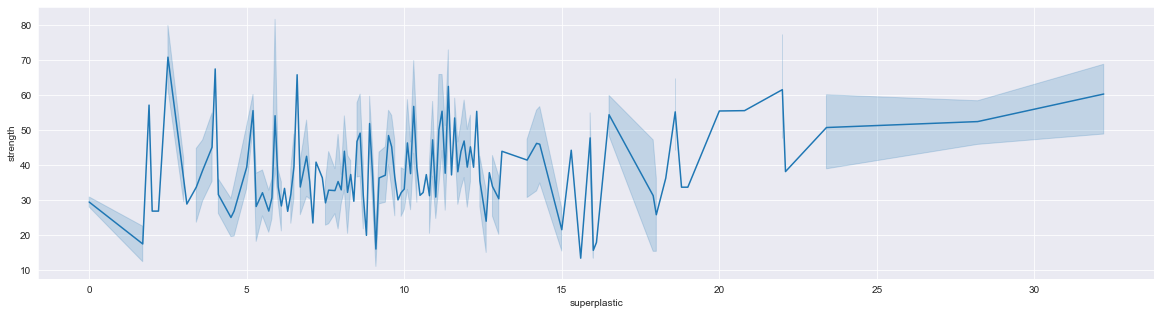

In [80]:
plt.figure(figsize=(20,5))
sns.lineplot(x='superplastic',y='strength', data=df )
plt.show()

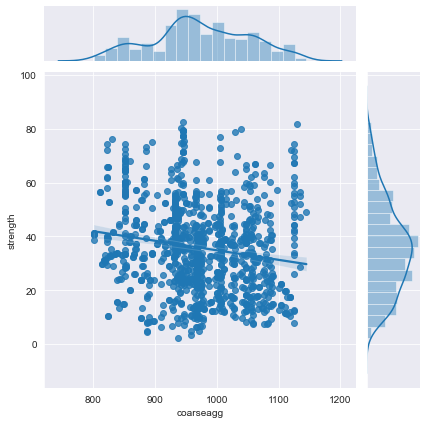

In [81]:
sns.jointplot(x="coarseagg", y="strength", data=df, kind="reg")
plt.show()

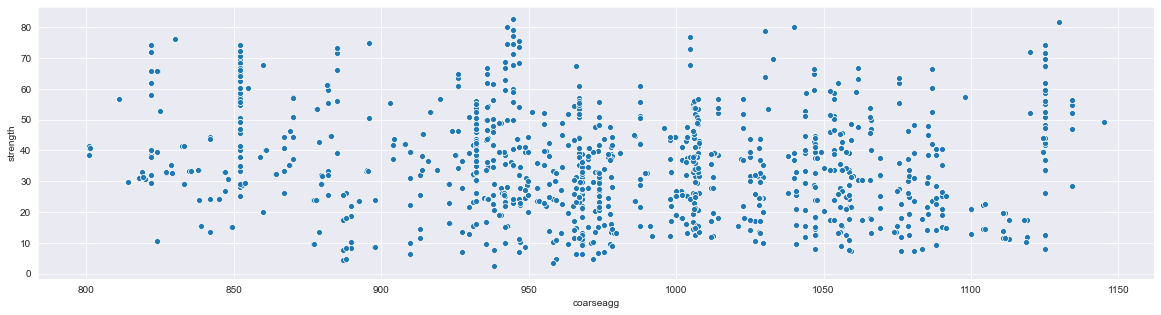

In [82]:
#['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
plt.figure(figsize=(20,5)) # set figure size.
sns.scatterplot(df['coarseagg'], df['strength'])
plt.show()

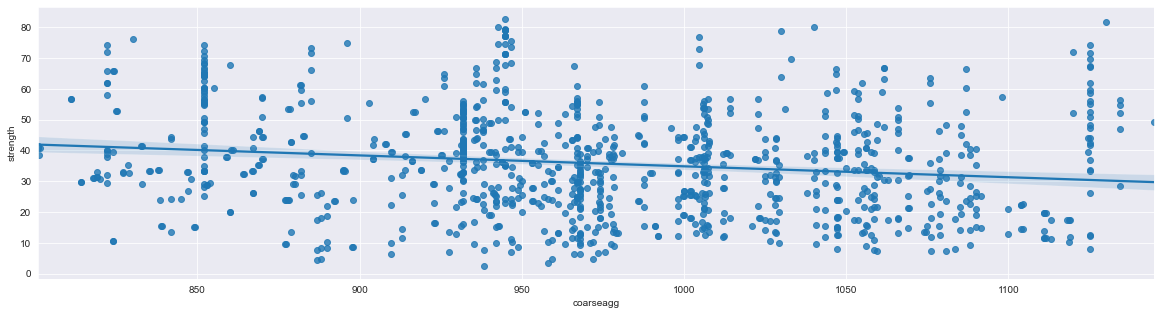

In [83]:
plt.figure(figsize=(20,5))
sns.regplot(x='coarseagg',y='strength', data=df )
plt.show()

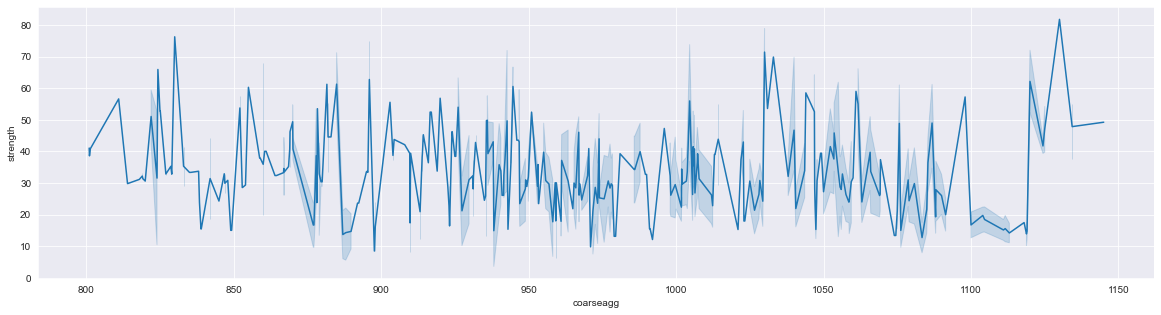

In [84]:
plt.figure(figsize=(20,5))
sns.lineplot(x='coarseagg',y='strength', data=df )
plt.show()

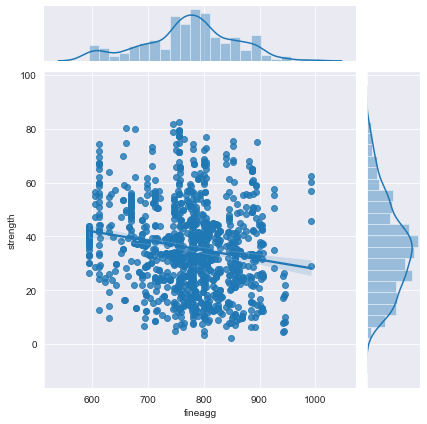

In [85]:
sns.jointplot(x="fineagg", y="strength", data=df, kind="reg")
plt.show()

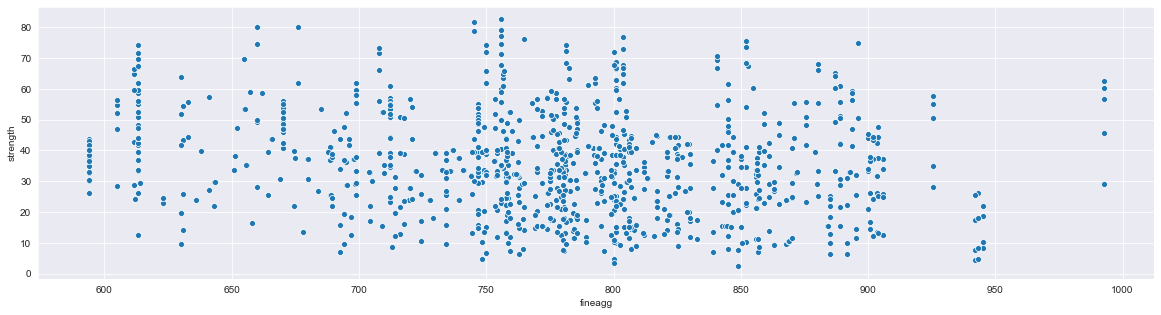

In [86]:
plt.figure(figsize=(20,5)) # set figure size.
sns.scatterplot(df['fineagg'], df['strength'])
plt.show()

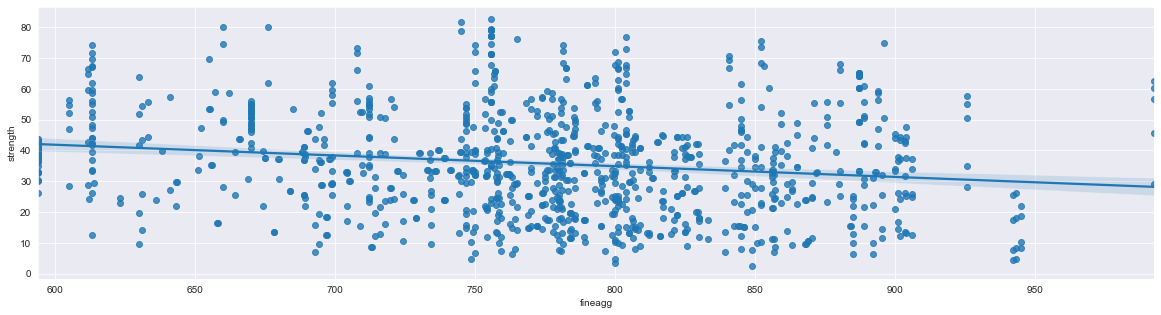

In [87]:
plt.figure(figsize=(20,5))
sns.regplot(x='fineagg',y='strength', data=df )
plt.show()

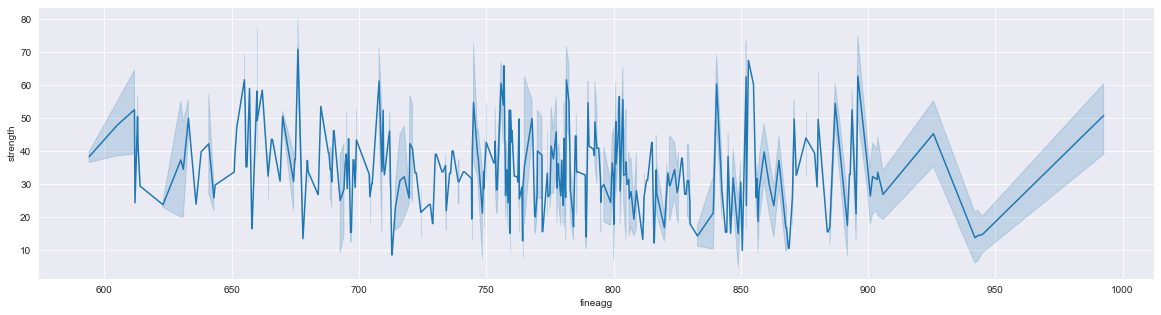

In [88]:
plt.figure(figsize=(20,5))
sns.lineplot(x='fineagg',y='strength', data=df )
plt.show()

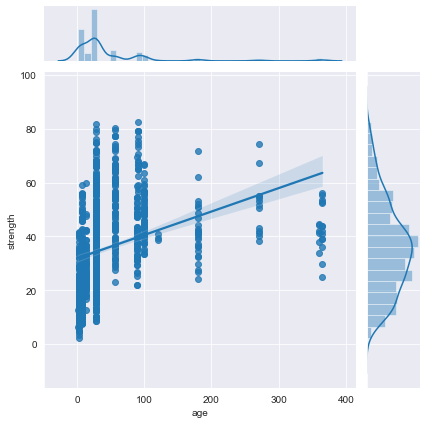

In [89]:
sns.jointplot(x="age", y="strength", data=df, kind="reg")
plt.show()

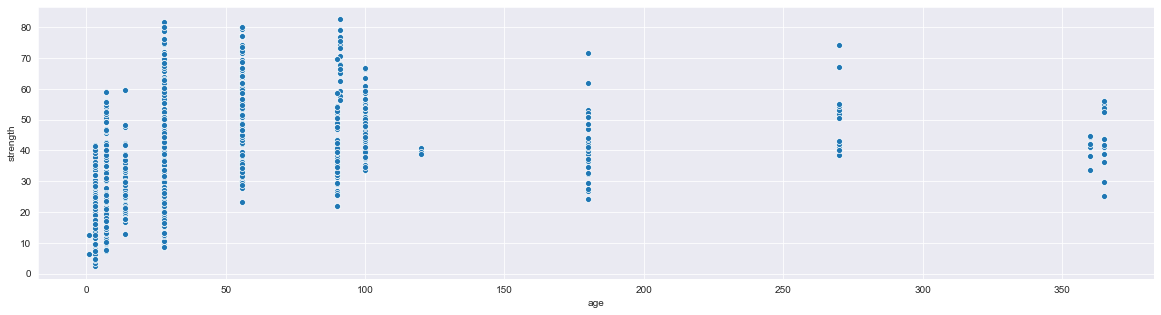

In [90]:
#['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
plt.figure(figsize=(20,5)) # set figure size.
sns.scatterplot(df['age'], df['strength'])
plt.show()

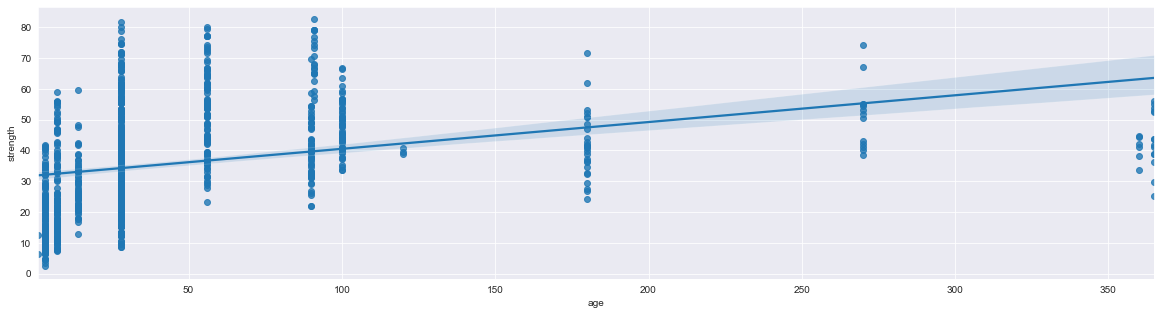

In [91]:
plt.figure(figsize=(20,5))
sns.regplot(x='age',y='strength', data=df )
plt.show()

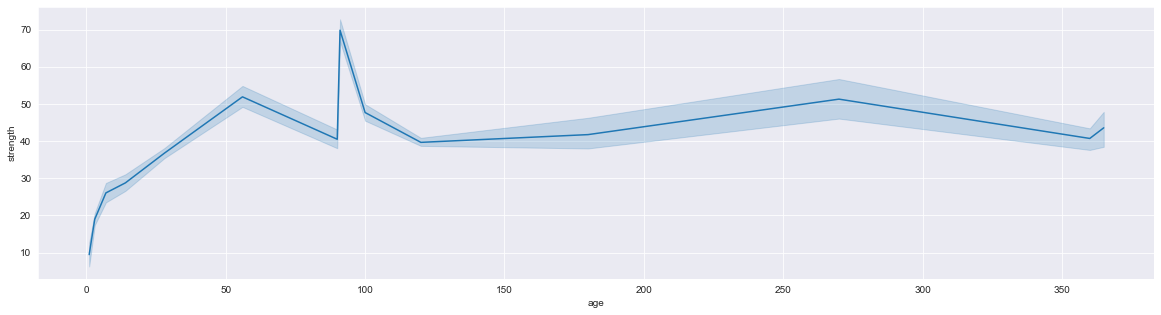

In [92]:
plt.figure(figsize=(20,5))
sns.lineplot(x='age',y='strength', data=df )
plt.show()

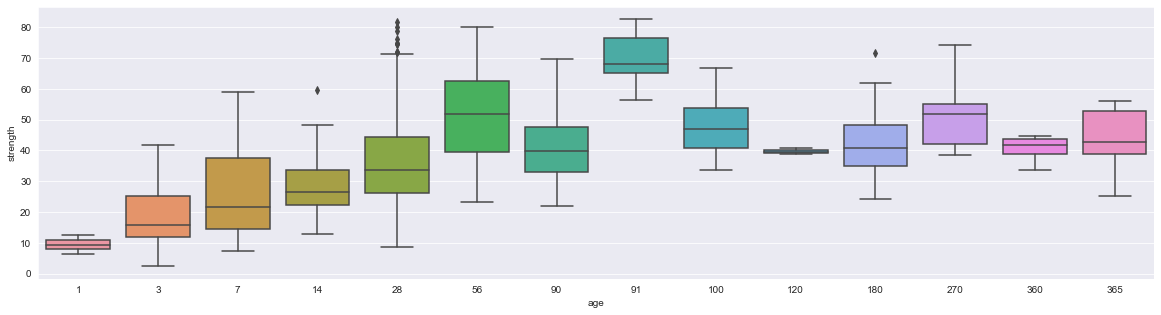

In [93]:
plt.figure(figsize=(20,5))
sns.boxplot(x="age", y="strength", data=df)
plt.show()

In [94]:
df.corr()  # prints the correlation coefficient between every pair of attributes

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water        -0.450661  0.277618 -0.289633  
superplastic  0.222691 -0.192700  0.366079  
coarseagg    -0.178481 -0.003016 -0.164935  
fineagg       1.000000 -0.156095 -0.167241  
age          -0.156095  1.000000  0.328873  
strength     -0.167241  0.328873  1.000000

# Use correlation method to observe the relationship between different variables and state your insights.

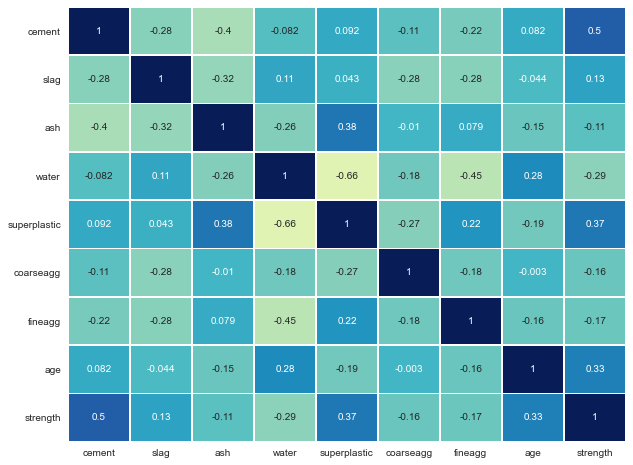

In [95]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()


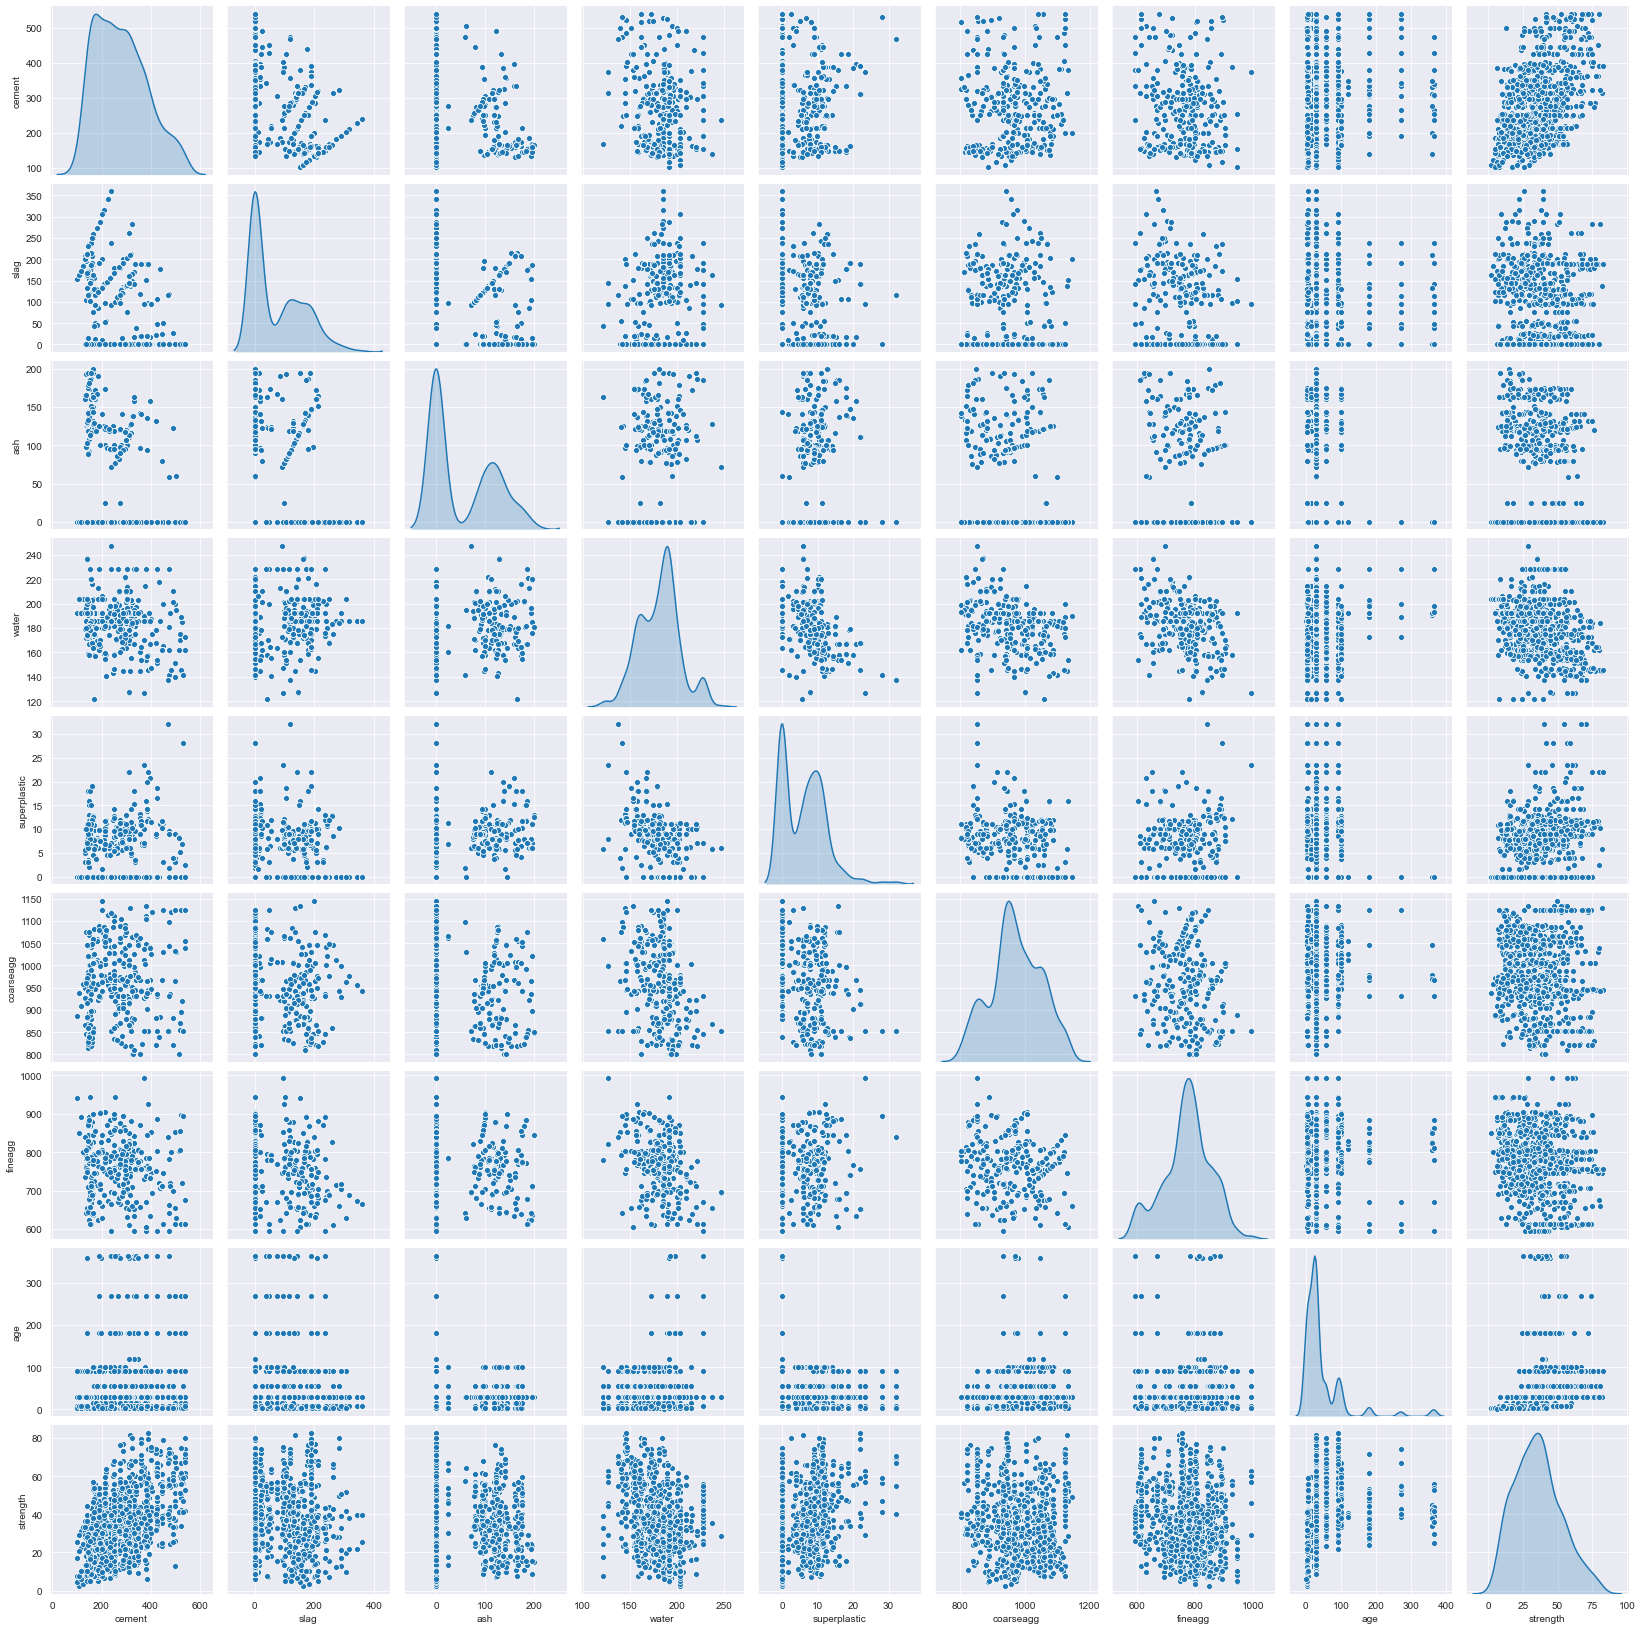

In [96]:
sns.pairplot(df,  diag_kind='kde')
plt.show()

###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Deliverable - 3: 
<font color=darkblue>
Feature Engineering techniques – (10 markrs) 
<br>Prepare Data for analysis
    
1. Identify opportunities (if any) to extract a new feature from existing features, drop a feature (if required). 

2. Get the data model ready and do a train test split.

3. Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree


In [97]:
# Ash, Slag and Superplastic has a lot of zeros are they missing values and need to be imputed ?
#Domain Literatue says they can have zero values.
#Lets run an imputing experiment with KNN and Simple imputers and test along with the original data.
#['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg', 'fineagg', 'age', 'strength']
df2 = df.copy()
cols=['slag','ash','superplastic']
df2[cols] = df[cols].replace({0:np.nan})
df2.isna().sum()

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

In [98]:
#Imputation for completing missing values using k-Nearest Neighbors.
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

In [99]:
df2[:] = imputer.fit_transform(df2)
df2.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [100]:
(df2 == 0).sum() # We don't have zero values for Slag, ash and Superplastic anymore in the imputed dataframe

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [101]:
#from sklearn.impute import SimpleImputer
df3 = df.copy() 
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=['slag','ash','superplastic']
imputer = rep_0.fit(df3[cols])
df3[cols] = imputer.transform(df3[cols])

In [102]:
#Split Data
# independant variables
X = df.drop('strength', axis=1)
# the dependent variable
y = df[['strength']]


X2 = df2.drop('strength', axis=1)
# the dependent variable
y2 = df2[['strength']]

X3 = df3.drop('strength', axis=1)
# the dependent variable
y3 = df3[['strength']]


In [103]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
#Imputed Data KNN
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=1)
#Imputed Data Simple Imputer
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=1)

In [104]:
#Imputed Data KNN
print("{0:0.2f}% data is in training set".format((len(X3_train)/len(df3.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X3_test)/len(df3.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [105]:
#Imputed Data KNN
print("{0:0.2f}% data is in training set".format((len(X2_train)/len(df2.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X2_test)/len(df2.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [106]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [107]:
#Fit Linear Model for Imputed data (Simple)
regression_model3 = LinearRegression()
regression_model3.fit(X3_train, y3_train)
#The score (R^2) for in-sample and out of sample
print(regression_model3.score(X3_train, y3_train))
print(regression_model3.score(X3_test, y3_test))

0.5856773138344322
0.6377597092854768


In [108]:
#Fit Linear Model for Imputed data (KNN)
regression_model2 = LinearRegression()
regression_model2.fit(X2_train, y2_train)
#The score (R^2) for in-sample and out of sample
print(regression_model2.score(X2_train, y2_train))
print(regression_model2.score(X2_test, y2_test))

0.563630280491187
0.6107547972314378


In [109]:
#Fit Linear Model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
#The score (R^2) for in-sample and out of sample
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.603148754063023
0.6339136715208276


<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">We have better scores with the original data</span>

In [110]:
#Here are the coefficients for each variable and the intercept for the imputed data (KNN)
for idx, col_name in enumerate(X3_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model3.coef_[0][idx]))

The coefficient for cement is 0.05736501634608828
The coefficient for slag is 0.03565818187122696
The coefficient for ash is -0.09427651708332388
The coefficient for water is -0.5178015872280549
The coefficient for superplastic is -0.6531765531474526
The coefficient for coarseagg is -0.07331597765742572
The coefficient for fineagg is -0.06524548742999442
The coefficient for age is 0.11089063736389715


In [111]:
#Here are the coefficients for each variable and the intercept for the imputed data (KNN)
for idx, col_name in enumerate(X2_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model2.coef_[0][idx]))

The coefficient for cement is 0.050053779454107654
The coefficient for slag is 0.017251825366983248
The coefficient for ash is -0.04720374260559323
The coefficient for water is -0.4891381099967235
The coefficient for superplastic is -0.35773477892779304
The coefficient for coarseagg is -0.0745865396789274
The coefficient for fineagg is -0.0650317356088699
The coefficient for age is 0.1064528939787776


In [112]:
#Here are the coefficients for each variable and the intercept
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.12655755592921436
The coefficient for slag is 0.10882841423627
The coefficient for ash is 0.09070514083244792
The coefficient for water is -0.10315724008089974
The coefficient for superplastic is 0.37612343073244137
The coefficient for coarseagg is 0.024028594961397042
The coefficient for fineagg is 0.036192894560112265
The coefficient for age is 0.11043496734221787


In [113]:
#Let us generate polynomial models reflecting the non-linear interaction between some dimensions
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [114]:
#Imputed Data (Simple)
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X3_poly_train = poly.fit_transform(X3_train)
X3_poly_test = poly.fit_transform(X3_test)

poly_clf3 = linear_model.LinearRegression()

poly_clf3.fit(X3_poly_train, y3_train)

y3_pred = poly_clf3.predict(X3_poly_test)

#The score (R^2) for in-sample and out of sample for the imputed data. 
#The scrores drop here when you compare the non imputed data above
print(poly_clf3.score(X3_poly_train, y3_train))
print(poly_clf3.score(X3_poly_test, y3_test))

0.7135378101794343
0.7061982574676615


In [115]:
#Imputed Data (KNN)
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X2_poly_train = poly.fit_transform(X2_train)
X2_poly_test = poly.fit_transform(X2_test)

poly_clf2 = linear_model.LinearRegression()

poly_clf2.fit(X2_poly_train, y2_train)

y2_pred = poly_clf2.predict(X2_poly_test)

#The score (R^2) for in-sample and out of sample for the imputed data. 
#The scrores drop here when you compare the non imputed data above
print(poly_clf2.score(X2_poly_train, y2_train))
print(poly_clf2.score(X2_poly_test, y2_test))

0.6998405625068672
0.694364877257546


In [116]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_poly_train, y_train)

y_pred = poly_clf.predict(X_poly_test)

#The score (R^2) for in-sample and out of sample (our measure of sucess and does improve)
print(poly_clf.score(X_poly_train, y_train))
print(poly_clf.score(X_poly_test, y_test))

0.754957826884826
0.7444710081439875


<span style="font-family: Arial; font-weight:bold;font-size:1.0em;color:#0e92ea">We have better scores with the poly data derived from the original data</span>

In [117]:
# Polynomial models improve the scores at the cost of 29 extra variables!
print(X_train.shape)
print(X_poly_train.shape)

(721, 8)
(721, 37)


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Working with Outliers: Correcting, Removing

Use previously calculated IQR score to filter out the outliers by keeping only valid values.

In [118]:

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
df_out.shape


(941, 9)

In [119]:

concrete_df = df.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(concrete_df < Q1 - 1.5 * IQR)[0], np.where(concrete_df < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    concrete_df.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(concrete_df > Q3 + 1.5 * IQR)[0], np.where(concrete_df > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    concrete_df.iloc[i,j] = whisker[j]


In [120]:
concrete_df.shape, df.shape

((1030, 9), (1030, 9))

## Split Data

In [121]:
sim_df = concrete_df.copy()
features = [col for col in df.columns if col != 'strength']
X = sim_df.drop("strength" , axis=1)
y = sim_df.pop("strength")

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

Lets check split of data

In [123]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

70.00% data is in training set
30.00% data is in test set


###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Deliverable - 4: 
<font color=darkblue>
(Creating the model and tuning it)    
<br/>1. Algorithms that you think will be suitable for this project (at least 3 algorithms). Use Kfold Cross Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (15 marks)


## Use Linear Regression model to predict concrete strength

In [124]:
#Fit Linear Model for Imputed data
lr = LinearRegression()
lr.fit(X_train, y_train)
#The score (R^2) for in-sample and out of sample
print(lr.score(X_train, y_train))

0.7254766837389761


In [125]:
#Test accuracy calculation
lr_score = lr.score(X_test, y_test)
print(lr_score)

0.7320709753755359


In [126]:
#Let us generate polynomial models reflecting the non-linear interaction between some dimensions
poly = PolynomialFeatures(degree = 2, interaction_only=True)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_poly_train, y_train)

y_pred = poly_clf.predict(X_poly_test)

#The score (R^2) for in-sample and out of sample (our measure of sucess and does improve)
print(poly_clf.score(X_poly_train, y_train))
print(poly_clf.score(X_poly_test, y_test))

0.8016388489476827
0.771573696240264


# K-fold cross-validation

k-fold cross validation( without stratification)

Usually k is set as 10-20 in practical settings, depends on data set size

In [127]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [128]:
num_folds = 10
seed = 77

In [129]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [130]:
#Linear Regression
lr_results = cross_val_score(poly_clf,X, y, cv=kfold)
lr_results

array([0.61430298, 0.75307199, 0.80886409, 0.6906449 , 0.69362931,
       0.76876222, 0.73228017, 0.73386   , 0.65621188, 0.6756641 ])

In [131]:
kfm = np.mean(abs(lr_results))

In [132]:
kfstd = lr_results.std()

In [133]:
from sklearn.metrics import mean_squared_error, r2_score

mse =  mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
# The mean squared error
print('Mean squared error: %.2f'%mse)
# Explained variance score: 1 is perfect prediction
print('Test Variance score(R2 Score): %.2f'% r2)
print('Root Mean Square Error: %.2f'%rmse)
resultsDf = pd.DataFrame({'Method':['Linear Regression'],'MSE': mse,'RMSE': rmse,'R2': r2,'K-Fold-M': kfm,'K-Fold-STD':kfstd})

Mean squared error: 66.29
Test Variance score(R2 Score): 0.77
Root Mean Square Error: 8.14


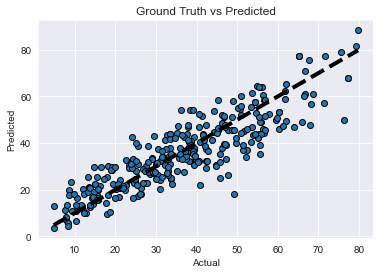

In [134]:
# So let's run the model against the test data

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

## Use Decision Tree Regressor model to predict concrete strength

In [135]:
#Decision Tree Regressor
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
dt = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
dtm = dt.fit(X_poly_train, y_train) 

In [136]:
y_pred = dt.predict(X_poly_test) 
regressor_score = dt.score(X_poly_train, y_train)

In [137]:
# Have a look at R_squared to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('coefficient of determination R^2 of the prediction.: ',regressor_score)

coefficient of determination R^2 of the prediction.:  0.9946689474106676


In [138]:
#Decision Tree Regressor
dt_results = cross_val_score(dtm,X, y, cv=kfold)
dt_results

array([0.80659676, 0.85393777, 0.919288  , 0.86058351, 0.77771742,
       0.91098908, 0.90087165, 0.8824009 , 0.87247958, 0.89305507])

In [139]:
kfm = np.mean(abs(dt_results))

In [140]:
kfstd = dt_results.std()

In [141]:
# The mean squared error
mse =  mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
print('Mean squared error: %.2f'% mse)
# Explained variance score: 1 is perfect prediction
print('Test Variance score(R2 Score): %.2f'% r2)
print('Root Mean Square Error: %.2f'%rmse)
resultsDf = resultsDf[['Method', 'MSE', 'RMSE', 'R2', 'K-Fold-M', 'K-Fold-STD']]
tempResultsDf=pd.DataFrame({'Method':['Decision Tree'],'MSE': mse,'RMSE': rmse,'R2': r2,'K-Fold-M': kfm,'K-Fold-STD':kfstd})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'MSE', 'RMSE', 'R2', 'K-Fold-M', 'K-Fold-STD']]
#resultsDf

Mean squared error: 49.54
Test Variance score(R2 Score): 0.83
Root Mean Square Error: 7.04


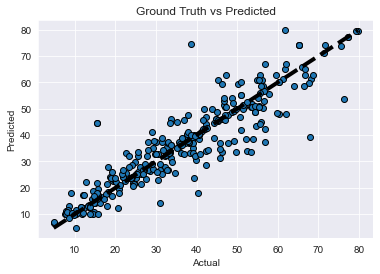

In [142]:
# So let's run the model against the test data

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

## Use RandomForest Regressor model to predict concrete strength

In [143]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=9, random_state=0)
# fit the regressor with X and Y data 
rfm = rf.fit(X_poly_train, y_train) 

y_pred = rf.predict(X_poly_test) 
score = rf.score(X_poly_train, y_train)

# Have a look at R_squared to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print('coefficient of determination R^2 of the prediction.: ',score)

coefficient of determination R^2 of the prediction.:  0.9756467965636708


In [144]:
#RandomForest Regressor
rf_results = cross_val_score(rfm,X, y, cv=kfold)
rf_results

array([0.86463653, 0.88786995, 0.94510377, 0.90682895, 0.87564748,
       0.92357981, 0.92716619, 0.9116324 , 0.91212708, 0.92057266])

In [145]:
kfm = np.mean(abs(rf_results))

In [146]:
kfstd = rf_results.std()

In [147]:
# The mean squared error
mse =  mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
print('Mean squared error: %.2f'% mse)
# Explained variance score: 1 is perfect prediction
print('Test Variance score(R2 Score): %.2f'% r2)
print('Root Mean Square Error: %.2f'%rmse)
resultsDf = resultsDf[['Method', 'MSE', 'RMSE', 'R2', 'K-Fold-M', 'K-Fold-STD']]
tempResultsDf=pd.DataFrame({'Method':['Random Forest'],'MSE': mse,'RMSE': rmse,'R2': r2,'K-Fold-M': kfm,'K-Fold-STD':kfstd})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'MSE', 'RMSE', 'R2', 'K-Fold-M', 'K-Fold-STD']]
#resultsDf

Mean squared error: 30.11
Test Variance score(R2 Score): 0.90
Root Mean Square Error: 5.49


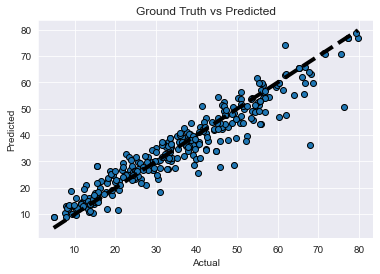

In [148]:
# So let's run the model against the test data

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [149]:
#Scores of the three algorithms
resultsDf

Method        MSE      RMSE        R2  K-Fold-M  K-Fold-STD
0  Linear Regression  66.292016  8.141991  0.771574  0.712729    0.054723
0      Decision Tree  49.537915  7.038318  0.829304  0.867792    0.043114
0      Random Forest  30.111319  5.487378  0.896244  0.907516    0.023466

###  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Deliverable - 4: 
<font color=darkblue>
(Creating the model and tuning it)    
<br/>2. Techniques employed to squeeze that extra performance out of the model without making it over fit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)


In [150]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Look at parameters used by our current Random forest Model
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 9,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [151]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [152]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_poly_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.2min finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(max_depth=9, random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [153]:
print(rf_random.best_params_)

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}


In [154]:
best_random = rf_random.best_estimator_

In [155]:
best_random

RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=400,
                      random_state=0)

In [156]:
y_pred = best_random.predict(X_poly_test) 
score = best_random.score(X_poly_train, y_train)
# The mean squared error
mse =  mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
print('Mean squared error: %.2f'% mse)
# Explained variance score: 1 is perfect prediction
print('Test Variance score(R2 Score): %.2f'% r2)
print('Root Mean Square Error: %.2f'%rmse)

Mean squared error: 26.17
Test Variance score(R2 Score): 0.91
Root Mean Square Error: 5.12


In [157]:
resultsDf = resultsDf[['Method', 'MSE', 'RMSE', 'R2', 'K-Fold-M', 'K-Fold-STD']]
tempResultsDf=pd.DataFrame({'Method':['Random Forest (RandomizedSearchCV)'],'MSE': mse,'RMSE': rmse,'R2': r2,'K-Fold-M': np.nan,'K-Fold-STD':np.nan})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'MSE', 'RMSE', 'R2', 'K-Fold-M', 'K-Fold-STD']]

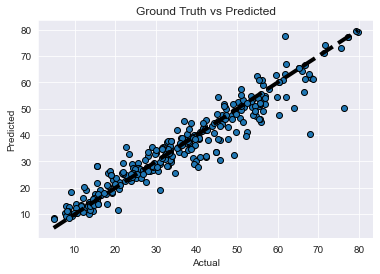

In [158]:
# So let's run the model against the test data

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [159]:
resultsDf

Method        MSE      RMSE        R2  \
0                   Linear Regression  66.292016  8.141991  0.771574   
0                       Decision Tree  49.537915  7.038318  0.829304   
0                       Random Forest  30.111319  5.487378  0.896244   
0  Random Forest (RandomizedSearchCV)  26.172972  5.115953  0.909814   

   K-Fold-M  K-Fold-STD  
0  0.712729    0.054723  
0  0.867792    0.043114  
0  0.907516    0.023466  
0       NaN         NaN

In [160]:
print('Parameters currently in use:\n')
pprint(dt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}


In [161]:
#Tuning Desicion Tree using Grid Search
from sklearn.metrics import make_scorer
scoring = make_scorer(r2_score)
param_grid = [
    {'max_depth': range(2,16,2), 'max_features': [3, 4, 5]},
    {'random_state': [0, 1, 2, 3, 4], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}    
]
g_cv = GridSearchCV(dt,
              param_grid=param_grid,
              scoring=scoring, cv=5, refit=True)

g_cv.fit(X_poly_train, y_train)
g_cv.best_params_

{'min_samples_split': 11, 'random_state': 1}

In [162]:
best_dt = g_cv.best_estimator_

In [163]:
y_pred = best_dt.predict(X_poly_test) 
score = best_dt.score(X_poly_train, y_train)
# The mean squared error
mse =  mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)
print('Mean squared error: %.2f'% mse)
# Explained variance score: 1 is perfect prediction
print('Test Variance score(R2 Score): %.2f'% r2)
print('Root Mean Square Error: %.2f'%rmse)

Mean squared error: 51.09
Test Variance score(R2 Score): 0.82
Root Mean Square Error: 7.15


In [164]:
resultsDf = resultsDf[['Method', 'MSE', 'RMSE', 'R2', 'K-Fold-M', 'K-Fold-STD']]
tempResultsDf=pd.DataFrame({'Method':['Decision Tree (GridSearchCV)'],'MSE': mse,'RMSE': rmse,'R2': r2,'K-Fold-M': np.nan,'K-Fold-STD':np.nan})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'MSE', 'RMSE', 'R2', 'K-Fold-M', 'K-Fold-STD']]

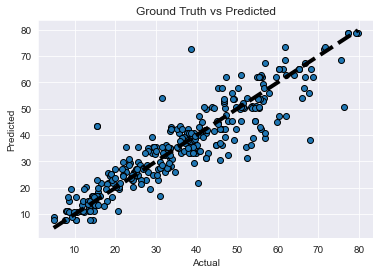

In [165]:
# So let's run the model against the test data

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [166]:
resultsDf

Method        MSE      RMSE        R2  \
0                   Linear Regression  66.292016  8.141991  0.771574   
0                       Decision Tree  49.537915  7.038318  0.829304   
0                       Random Forest  30.111319  5.487378  0.896244   
0  Random Forest (RandomizedSearchCV)  26.172972  5.115953  0.909814   
0        Decision Tree (GridSearchCV)  51.092695  7.147915  0.823947   

   K-Fold-M  K-Fold-STD  
0  0.712729    0.054723  
0  0.867792    0.043114  
0  0.907516    0.023466  
0       NaN         NaN  
0       NaN         NaN